In [20]:
!pip install kaggle

from google.colab import files
files.upload()

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d pranavraikokte/covid19-image-dataset

!unzip covid19-image-dataset.zip

Saving kaggle.json to kaggle (2).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
Dataset URL: https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset
License(s): CC-BY-SA-4.0
covid19-image-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  covid19-image-dataset.zip
replace Covid19-dataset/test/Covid/0100.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: Covid19-dataset/test/Covid/0100.jpeg  
  inflating: Covid19-dataset/test/Covid/0102.jpeg  
  inflating: Covid19-dataset/test/Covid/0105.png  
  inflating: Covid19-dataset/test/Covid/0106.jpeg  
  inflating: Covid19-dataset/test/Covid/0108.jpeg  
  inflating: Covid19-dataset/test/Covid/0111.jpg  
  inflating: Covid19-dataset/test/Covid/0112.jpg  
  inflating: Covid19-dataset/test/Covid/0113.jpg  
  inflating: Covid19-dataset/test/Covid/0115.jpeg  
  inflating: Covid19-dataset/test/Covid/0118.jpeg  
  inflating: Covid19-dataset/test/Covid/0119.jpe

In [21]:
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from keras.layers import *
from keras.models import Sequential
import keras.preprocessing.image as image
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
train_path = '/content/Covid19-dataset/train'
test_path  = '/content/Covid19-dataset/test'

In [23]:
image_classes = os.listdir('/content/Covid19-dataset/test')
image_classes

['Viral Pneumonia', 'Normal', 'Covid']

In [24]:
# visualization
def plot_images (image_classes) :
    plt.figure(figsize=(12,12))
    for i , category in enumerate (image_classes) :
        image_path = train_path + '/' + category   # '/kaggle/input/covid19-image-dataset/Covid19-dataset/train/Normal'
        image_in_folder = os.listdir(image_path)

        first_image = image_in_folder[0]
        first_image_path = image_path + '/' + first_image

        img = image.load_img(first_image_path)
        img_array = image.img_to_array(img) / 255

        plt.subplot(1,3, i+1)
        plt.imshow(img_array)
        plt.axis('off')
        plt.title(category)
    plt.show()

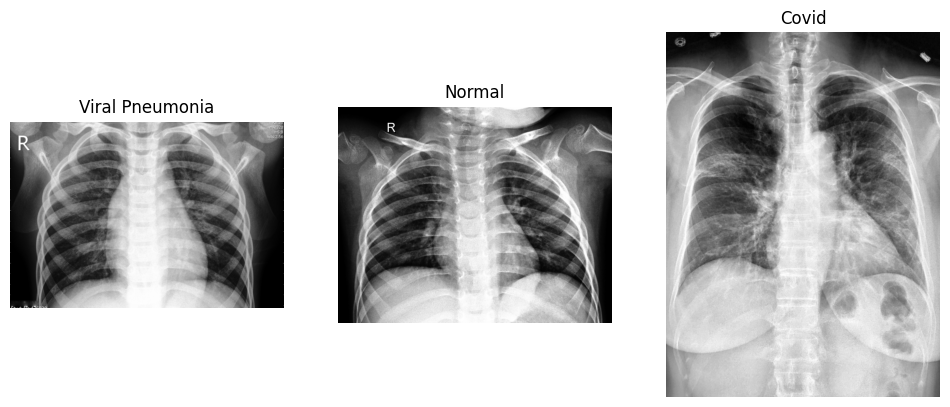

In [25]:
plot_images(image_classes)

In [28]:
# image preprocessing with image data generator
data_generator = ImageDataGenerator(rescale = 1/255)

In [29]:
train_data = data_generator.flow_from_directory(train_path ,
                                                target_size = (224,224),
                                                batch_size = 16)

Found 251 images belonging to 3 classes.


In [30]:
test_data = data_generator.flow_from_directory(test_path,
                                              target_size=(224,224),
                                              batch_size = 2)

Found 66 images belonging to 3 classes.


In [31]:
# build CNN model
model = Sequential()
# add convlutional layer
model.add(Conv2D(filters= 32 , kernel_size = 3 , padding = 'same' ,
                activation = 'relu' , input_shape = [224,224,3]))
# add pooling layer
model.add(MaxPooling2D(pool_size=(2,2)))

# add convlutional layer
model.add(Conv2D(filters= 32 , kernel_size = 3 , padding = 'same' ,
                activation = 'relu' ))
# add pooling layer
model.add(MaxPooling2D())

# add convlutional layer
model.add(Conv2D(filters= 32 , kernel_size = 3 , padding = 'same' ,
                activation = 'relu' ))
# add pooling layer
model.add(MaxPooling2D())

model.add(Dropout(0.2))

# add Flatten layer
model.add(Flatten())
# add fully connceted layers
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))

# add output layer
model.add(Dense(3,activation = 'softmax'))

In [32]:
model.compile(optimizer= 'adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [33]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 112, 112, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 56, 56, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 56, 56, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 28, 28, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,247,683 (12.39 MB)

 Trainable params: 3,247,683 (12.39 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# Fit the model
model_history = model.fit(train_data ,
                          epochs = 8,
                          validation_data = test_data)

Epoch 1/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 399ms/step - accuracy: 0.4361 - loss: 1.2368 - val_accuracy: 0.6667 - val_loss: 0.7146
Epoch 2/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 273ms/step - accuracy: 0.8504 - loss: 0.4444 - val_accuracy: 0.7879 - val_loss: 0.5898
Epoch 3/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 254ms/step - accuracy: 0.9266 - loss: 0.1953 - val_accuracy: 0.8333 - val_loss: 0.4128
Epoch 4/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 284ms/step - accuracy: 0.9029 - loss: 0.1639 - val_accuracy: 0.7879 - val_loss: 0.6787
Epoch 5/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 253ms/step - accuracy: 0.9575 - loss: 0.1306 - val_accuracy: 0.8939 - val_loss: 0.3245
Epoch 6/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 287ms/step - accuracy: 0.9852 - loss: 0.0656 - val_accuracy: 0.8030 - val_loss: 0.5043
Epoch 7/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 306ms/step - accuracy: 0.9865 - loss: 0.0492 - val_accuracy: 0.8939 - val_loss: 0.3097
Epoch 8/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 220ms/step - accuracy: 0.9878 - loss: 0.0378 - val_accuracy: 0.8030 

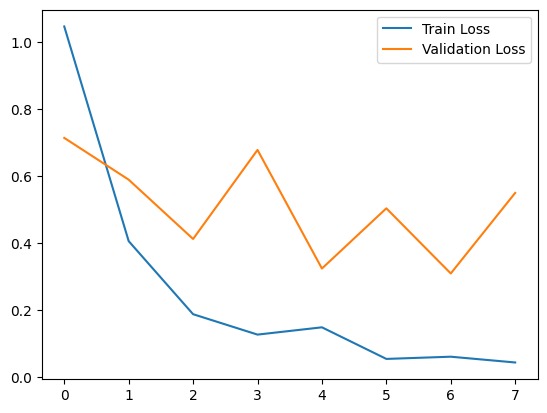

In [35]:
# visualize loss
plt.plot(model_history.history['loss'] , label = 'Train Loss')
plt.plot(model_history.history['val_loss'] , label = 'Validation Loss')
plt.legend()
plt.show()

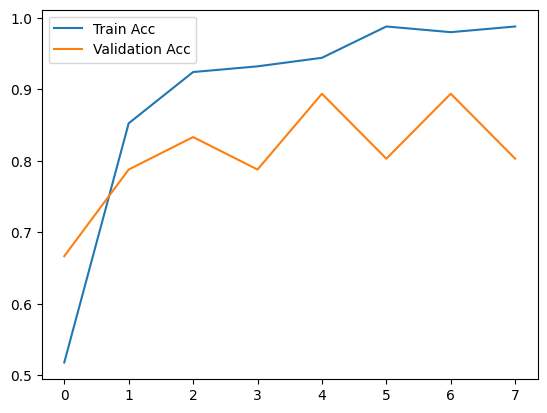

In [36]:
# visualize accuracy
plt.plot(model_history.history['accuracy'] , label = 'Train Acc')
plt.plot(model_history.history['val_accuracy'] , label = 'Validation Acc')
plt.legend()

In [37]:
# evaluate model
model.evaluate(test_data)

33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.7807 - loss: 0.9550


[0.5503435134887695, 0.8030303120613098]

In [38]:
model.save('Covid19_Model.h5')

VGG Model

In [39]:
!pip install tensorflow keras scikit-learn matplotlib seaborn

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.
Training VGG16...
Epoch 1/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 30s 964ms/step - accuracy: 0.3702 - loss: 1.2169 - val_accuracy: 0.7273 - val_loss: 0.9438
Epoch 2/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 365ms/step - accuracy: 0.5073 - loss: 1.0029 - val_accuracy: 0.6970 - val_loss: 0.8013
Epoch 3/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 301ms/step - accuracy: 0.6245 - loss: 0.7997 - val_accuracy: 0.8636 - val_loss: 0.6925
Epoch 4/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 262ms/step - accuracy: 0.7574 - loss: 0.7055 - val_accuracy: 0.7879 - val_loss: 0.6236
Epoch 5/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 323ms/step - accuracy: 0.7740 - loss: 0.5983 - val_accuracy: 0.8788 - val_loss: 0.5542
Epoch 6/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 281ms/step - accuracy: 0.8041 - loss: 0.5768 - val_accuracy: 0.8788 - val_loss: 0.5222
Epoch 7/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 306ms/step - accuracy: 0.8352 - loss: 0.5133 - val_accuracy: 0.8030 - val_loss: 0.4905
Epoch 8/8


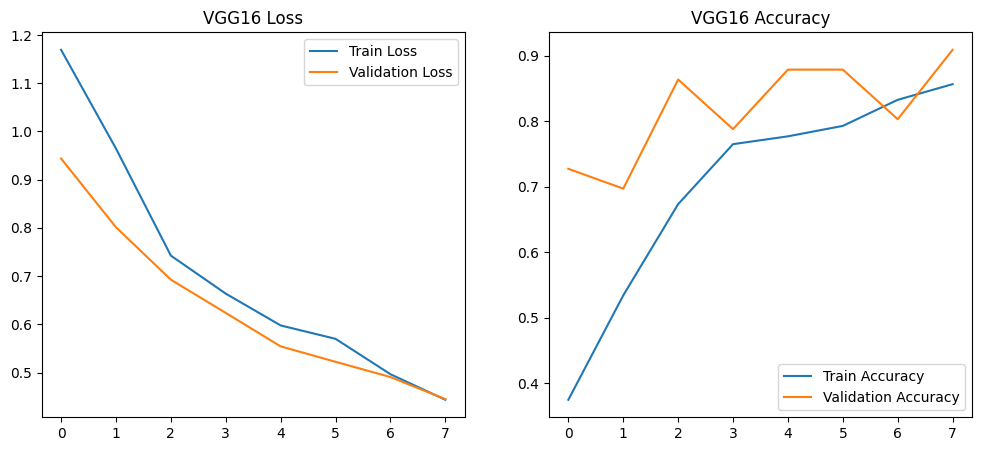

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 343ms/step


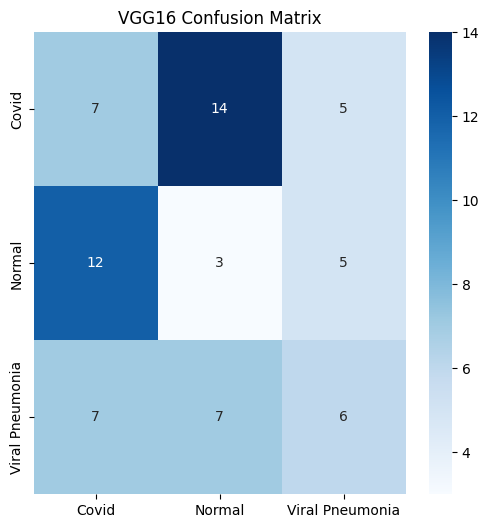

VGG16 Classification Report:
                 precision    recall  f1-score   support

          Covid       0.27      0.27      0.27        26
         Normal       0.12      0.15      0.14        20
Viral Pneumonia       0.38      0.30      0.33        20

       accuracy                           0.24        66
      macro avg       0.26      0.24      0.25        66
   weighted avg       0.26      0.24      0.25        66

Precision: 0.2564102564102564, Recall: 0.2397435897435897, F1-Score: 0.2463092463092463


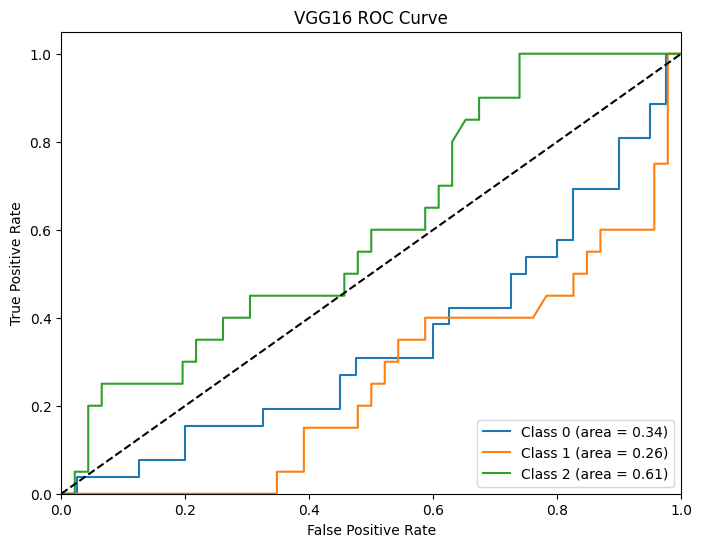

Training Xception...
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 32s 1s/step - accuracy: 0.6536 - loss: 0.7800 - val_accuracy: 0.7121 - val_loss: 0.5604
Epoch 2/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 248ms/step - accuracy: 0.9052 - loss: 0.2434 - val_accuracy: 0.7879 - val_loss: 0.4586
Epoch 3/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 298ms/step - accuracy: 0.9155 - loss: 0.2490 - val_accuracy: 0.8636 - val_loss: 0.3533
Epoch 4/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 250ms/step - accuracy: 0.9385 - loss: 0.1798 - val_accuracy: 0.8030 - val_loss: 0.4644
Epoch 5/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 271ms/step - accuracy: 0.9326 - loss: 0.1834 - val_accuracy: 0.8939 - val_loss: 0.3742
Epoch 6/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 301ms/step - accuracy: 0.9426 - loss: 0.1534 - val_accuracy: 0.8333 - val_loss: 0.3013
Epoch 7/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 279ms/step - accuracy: 0.9537 - loss: 0.1401 - val_accuracy: 0.8636 - val_loss: 0.3536
Epoch 8/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s

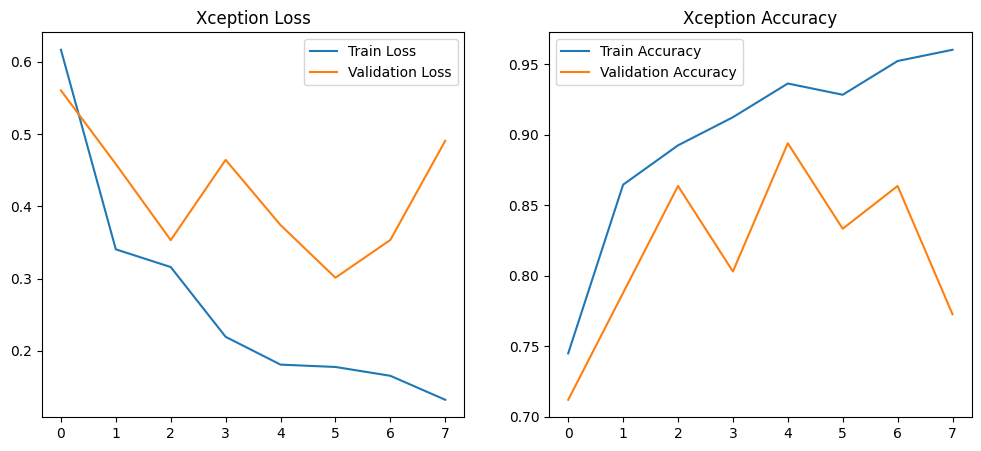

5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 841ms/step


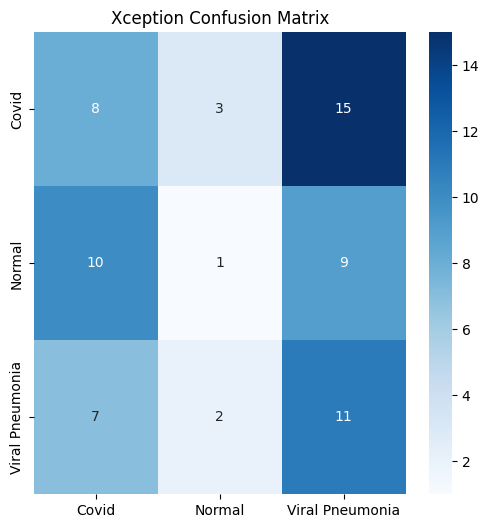

Xception Classification Report:
                 precision    recall  f1-score   support

          Covid       0.32      0.31      0.31        26
         Normal       0.17      0.05      0.08        20
Viral Pneumonia       0.31      0.55      0.40        20

       accuracy                           0.30        66
      macro avg       0.27      0.30      0.26        66
   weighted avg       0.27      0.30      0.27        66

Precision: 0.266984126984127, Recall: 0.3025641025641026, F1-Score: 0.2635495223730518


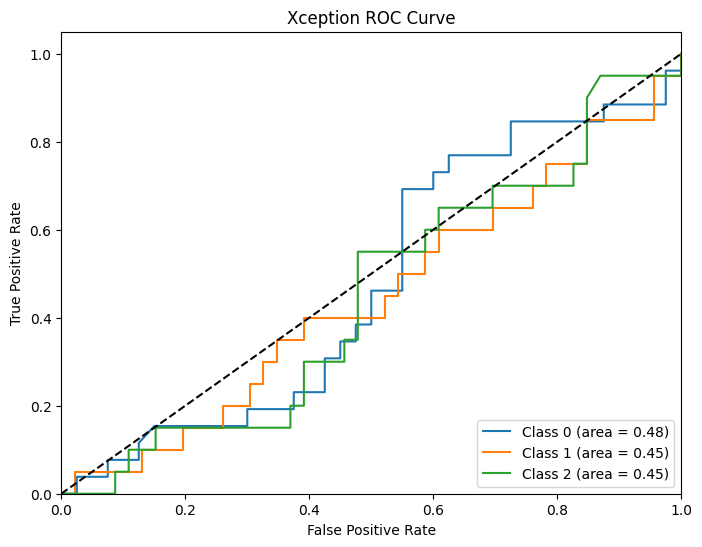

Training ResNet50...
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.4167 - loss: 1.3722 - val_accuracy: 0.6515 - val_loss: 1.0228
Epoch 2/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 291ms/step - accuracy: 0.4791 - loss: 1.0711 - val_accuracy: 0.6515 - val_loss: 0.9672
Epoch 3/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 247ms/step - accuracy: 0.4967 - loss: 0.9973 - val_accuracy: 0.5909 - val_loss: 0.9005
Epoch 4/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 8s 262ms/step - accuracy: 0.5859 - loss: 0.9191 - val_accuracy: 0.7273 - val_loss: 0.8323
Epoch 5/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 317ms/step - accuracy: 0.5947 - loss: 0.8898 - val_accuracy: 0.6818 - val_loss: 0.7769
Epoch 6/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 276ms/step - accuracy: 0.6661 - loss: 0.8266 - val_accuracy: 0.7424 - val_loss: 0.7523
Epoch 7/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 313ms/step - accuracy: 0.6379 - loss: 0.8166 - val_accuracy: 0.6970 - val_loss: 0.7043
Epoch 8/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s

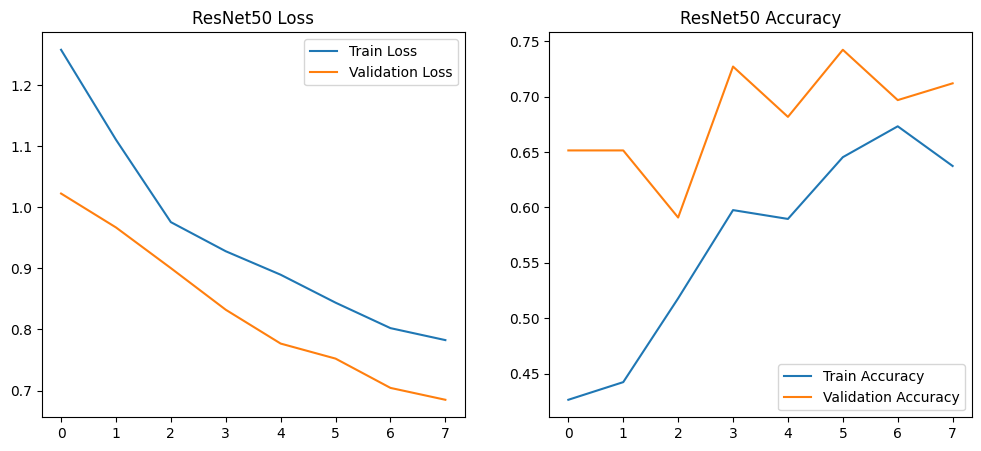

4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 937ms/step


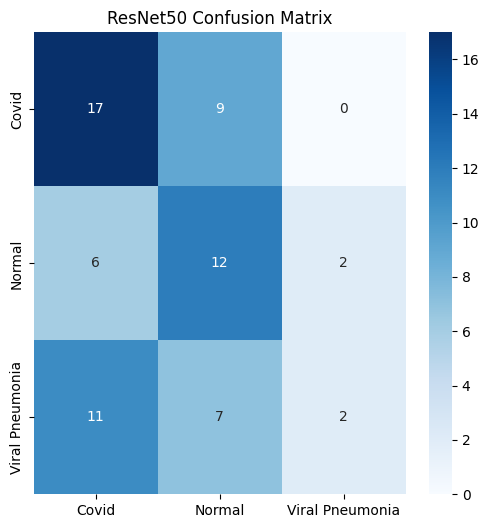

ResNet50 Classification Report:
                 precision    recall  f1-score   support

          Covid       0.50      0.65      0.57        26
         Normal       0.43      0.60      0.50        20
Viral Pneumonia       0.50      0.10      0.17        20

       accuracy                           0.47        66
      macro avg       0.48      0.45      0.41        66
   weighted avg       0.48      0.47      0.43        66

Precision: 0.4761904761904762, Recall: 0.4512820512820513, F1-Score: 0.41111111111111115


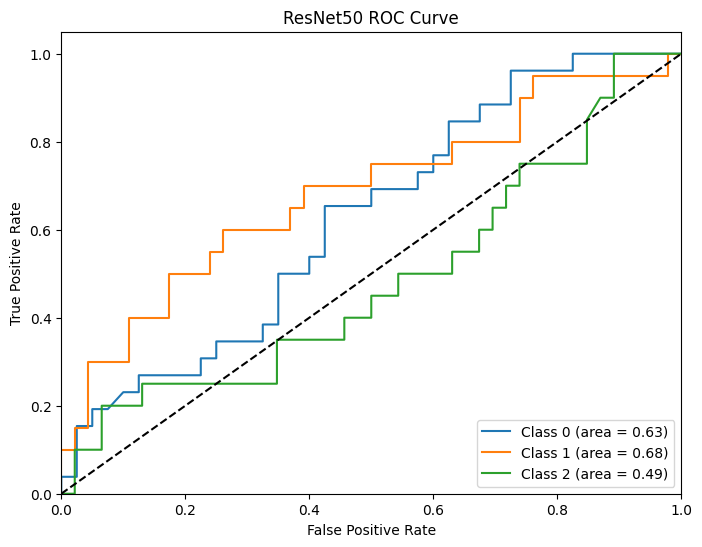

Epoch 1/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 20s 652ms/step - accuracy: 0.4884 - loss: 2.4189 - val_accuracy: 0.6818 - val_loss: 0.5985
Epoch 2/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 269ms/step - accuracy: 0.9052 - loss: 0.2983 - val_accuracy: 0.8939 - val_loss: 0.2399
Epoch 3/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 289ms/step - accuracy: 0.9523 - loss: 0.1776 - val_accuracy: 0.8636 - val_loss: 0.2595
Epoch 4/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 225ms/step - accuracy: 0.9761 - loss: 0.0795 - val_accuracy: 0.8939 - val_loss: 0.2184
Epoch 5/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 242ms/step - accuracy: 0.9854 - loss: 0.0485 - val_accuracy: 0.9091 - val_loss: 0.1872
Epoch 6/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 241ms/step - accuracy: 0.9869 - loss: 0.0495 - val_accuracy: 0.8788 - val_loss: 0.2825
Epoch 7/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 258ms/step - accuracy: 0.9783 - loss: 0.0884 - val_accuracy: 0.9394 - val_loss: 0.1542
Epoch 8/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 230ms/step - accuracy: 0.9898 - loss: 0.0334 - val_accuracy: 0.9394

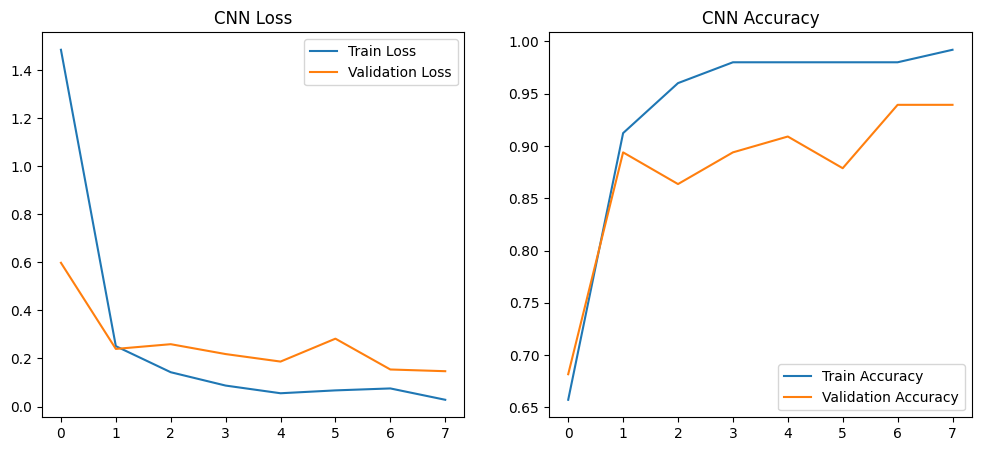

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 207ms/step


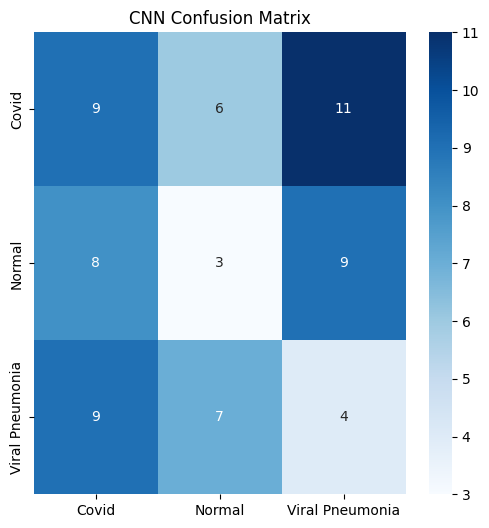

CNN Classification Report:
                 precision    recall  f1-score   support

          Covid       0.35      0.35      0.35        26
         Normal       0.19      0.15      0.17        20
Viral Pneumonia       0.17      0.20      0.18        20

       accuracy                           0.24        66
      macro avg       0.23      0.23      0.23        66
   weighted avg       0.24      0.24      0.24        66

Precision: 0.23344017094017092, Recall: 0.23205128205128203, F1-Score: 0.23154623154623155


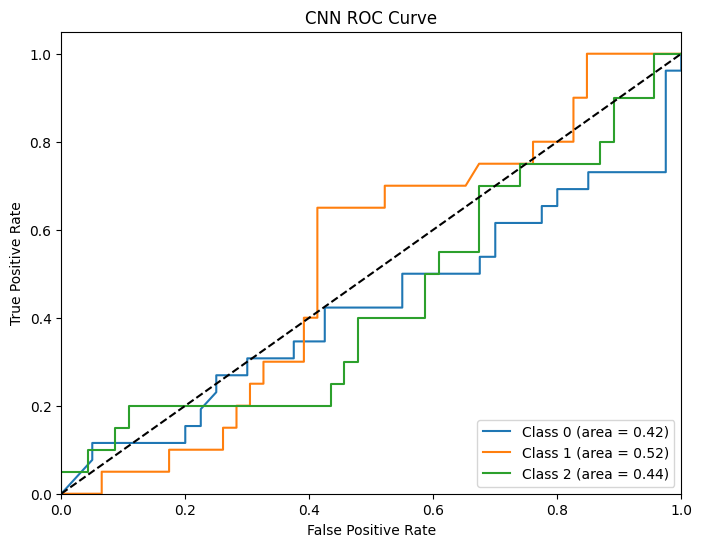

In [42]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from tensorflow.keras.applications import VGG16, Xception, ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import f1_score, precision_score, recall_score

# Load Dataset
train_path = '/content/Covid19-dataset/train'
test_path = '/content/Covid19-dataset/test'

# Image Data Preprocessing
data_generator = ImageDataGenerator(rescale=1/255)

train_data = data_generator.flow_from_directory(train_path,
                                                target_size=(224, 224),
                                                batch_size=16,
                                                class_mode='categorical')

test_data = data_generator.flow_from_directory(test_path,
                                               target_size=(224, 224),
                                               batch_size=16,
                                               class_mode='categorical')

# List of pre-trained models to use
pretrained_models = {
    "VGG16": VGG16,
    "Xception": Xception,
    "ResNet50": ResNet50
}

# Build and Compile Model Function
def build_and_compile_model(model_name, num_classes=3):
    base_model = pretrained_models[model_name](input_shape=(224, 224, 3), include_top=False, weights='imagenet')
    base_model.trainable = False

    model = Sequential([
        base_model,
        GlobalAveragePooling2D(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train and Evaluate Function
def train_and_evaluate_model(model, train_data, test_data, model_name):
    # Train the model
    history = model.fit(train_data, epochs=8, validation_data=test_data)

    # Evaluate the model
    results = model.evaluate(test_data)
    print(f"Test Loss: {results[0]}, Test Accuracy: {results[1]}")

    # Plot Accuracy and Loss
    plt.figure(figsize=(12, 5))

    # Loss Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{model_name} Loss')
    plt.legend()

    # Accuracy Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{model_name} Accuracy')
    plt.legend()
    plt.show()

    return model, history

# Confusion Matrix, Precision, Recall, F1-Score, AUC-ROC Curve
def evaluate_model_performance(model, test_data, model_name):
    # Get the predictions and true labels
    y_pred = model.predict(test_data)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_true_labels = test_data.classes

    # Confusion Matrix
    cm = confusion_matrix(y_true_labels, y_pred_labels)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_data.class_indices.keys(),
                yticklabels=test_data.class_indices.keys())
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

    # Classification Report
    print(f'{model_name} Classification Report:')
    print(classification_report(y_true_labels, y_pred_labels, target_names=test_data.class_indices.keys()))

    # Precision, Recall, F1-Score
    precision = precision_score(y_true_labels, y_pred_labels, average='macro')
    recall = recall_score(y_true_labels, y_pred_labels, average='macro')
    f1 = f1_score(y_true_labels, y_pred_labels, average='macro')
    print(f'Precision: {precision}, Recall: {recall}, F1-Score: {f1}')

    # AUC-ROC Curve (Multi-class)
    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(3):  # For each class
        fpr[i], tpr[i], _ = roc_curve(y_true_labels == i, y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8, 6))
    for i in range(3):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

# Iterate through each model
for model_name in pretrained_models.keys():
    print(f"Training {model_name}...")
    model = build_and_compile_model(model_name)
    model, history = train_and_evaluate_model(model, train_data, test_data, model_name)
    evaluate_model_performance(model, test_data, model_name)

# CNN Model
def build_and_compile_cnn():
    model = Sequential()

    # Add convolutional layers
    model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(224, 224, 3)))
    model.add(MaxPooling2D(pool_size=2))

    model.add(Conv2D(64, kernel_size=3, activation='relu'))
    model.add(MaxPooling2D(pool_size=2))

    model.add(Flatten())

    # Add fully connected layers
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation='softmax'))  # 3 output classes

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train and Evaluate CNN Model
cnn_model = build_and_compile_cnn()
cnn_model, cnn_history = train_and_evaluate_model(cnn_model, train_data, test_data, 'CNN')
evaluate_model_performance(cnn_model, test_data, 'CNN')